In [81]:
# import cv2 

# img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
# print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [82]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [83]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [84]:
dirname = os.path.join(os.getcwd(),'C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\
C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\DienteAmarillo 1
C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\Girasol 3720
C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\Lantana 2504
C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\Lirio 4080
C:/Users/kalan/Desktop/IA/Flores2/Dataset3/Transformadas/\Vinca 3480
Directorios leidos: 5
Imagenes en cada directorio [3721, 2504, 4080, 3480, 3719]
suma Total de imagenes en subdirs: 17504


# Creamos las etiquetas

In [85]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  17504


In [86]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 DienteAmarillo
1 Girasol
2 Lantana
3 Lirio
4 Vinca


In [87]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [88]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (14003, 200, 200, 3) (14003,)
Testing data shape :  (3501, 200, 200, 3) (3501,)


Text(0.5, 1.0, 'Ground Truth : 4')

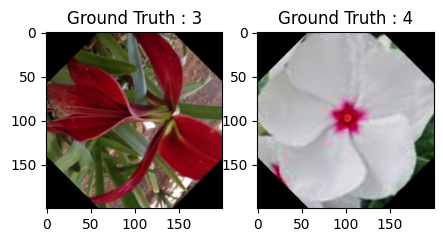

In [89]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

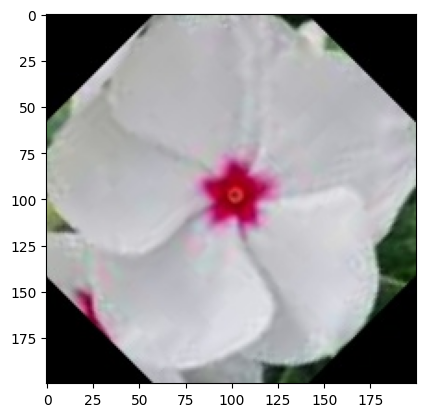

In [90]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [91]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [92]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [93]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(11202, 200, 200, 3) (2801, 200, 200, 3) (11202, 5) (2801, 5)


# Creamos el modelo de CNN

In [94]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 128 # cantidad de imágenes que se toman a la vez en memoria

In [95]:
flowersModel = Sequential()
flowersModel.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(200,200,3)))
flowersModel.add(LeakyReLU(alpha=0.1))
flowersModel.add(MaxPooling2D((2, 2),padding='same'))
flowersModel.add(Dropout(0.5))

flowersModel.add(Flatten())
flowersModel.add(Dense(32, activation='linear'))
flowersModel.add(LeakyReLU(alpha=0.1))
flowersModel.add(Dropout(0.5))
flowersModel.add(Dense(nClasses, activation='softmax'))

In [96]:
flowersModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 flatten_4 (Flatten)         (None, 320000)            0         
                                                                 
 dense_8 (Dense)             (None, 32)                10240032  
                                                      

In [97]:
flowersModel.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [98]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flowersTrain = flowersModel.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
88/88 [==============================] - 155s 2s/step - loss: 0.8544 - accuracy: 0.6859 - val_loss: 0.4480 - val_accuracy: 0.8729
Epoch 2/20
88/88 [==============================] - 144s 2s/step - loss: 0.5174 - accuracy: 0.8327 - val_loss: 0.3210 - val_accuracy: 0.9165
Epoch 3/20
88/88 [==============================] - 149s 2s/step - loss: 0.4106 - accuracy: 0.8725 - val_loss: 0.2415 - val_accuracy: 0.9536
Epoch 4/20
88/88 [==============================] - 165s 2s/step - loss: 0.3494 - accuracy: 0.8936 - val_loss: 0.1946 - val_accuracy: 0.9639
Epoch 5/20
88/88 [==============================] - 185s 2s/step - loss: 0.3046 - accuracy: 0.9127 - val_loss: 0.1609 - val_accuracy: 0.9704
Epoch 6/20
88/88 [==============================] - 195s 2s/step - loss: 0.2728 - accuracy: 0.9239 - val_loss: 0.1207 - val_accuracy: 0.9829
Epoch 7/20
88/88 [==============================] - 208s 2s/step - loss: 0.2395 - accuracy: 0.9338 - val_loss: 0.1060 - val_accuracy: 0.9857
Epoch 8/20
88

In [110]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flowersModel.save('C:/Users/kalan/Desktop/IA/Flores2/Generar/modeloDef5')


INFO:tensorflow:Assets written to: C:/Users/kalan/Desktop/IA/Flores2/Generar/modeloDef5\assets


INFO:tensorflow:Assets written to: C:/Users/kalan/Desktop/IA/Flores2/Generar/modeloDef5\assets


# Evaluamos la red

In [111]:
test_eval = flowersModel.evaluate(test_X, test_Y_one_hot, verbose=1)

110/110 [==============================] - 9s 81ms/step - loss: 0.0239 - accuracy: 0.9986


In [112]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.023925641551613808
Test accuracy: 0.9985718131065369


In [113]:
flowersTrain.history

{'loss': [0.8543544411659241,
  0.5173869132995605,
  0.41056978702545166,
  0.34936729073524475,
  0.3046394884586334,
  0.2728163003921509,
  0.23945069313049316,
  0.21274691820144653,
  0.20072928071022034,
  0.18743687868118286,
  0.1761009842157364,
  0.15646304190158844,
  0.14755868911743164,
  0.14084234833717346,
  0.1357758343219757,
  0.12857003509998322,
  0.12010908126831055,
  0.1143801361322403,
  0.11010746657848358,
  0.11018360406160355],
 'accuracy': [0.68594890832901,
  0.8327084183692932,
  0.87252277135849,
  0.8935904502868652,
  0.9126941561698914,
  0.9238528609275818,
  0.9337618350982666,
  0.9412605166435242,
  0.9459918141365051,
  0.948937714099884,
  0.9531333446502686,
  0.961792528629303,
  0.9634886384010315,
  0.964470624923706,
  0.9669702053070068,
  0.9658989310264587,
  0.9710766077041626,
  0.9717015027999878,
  0.9742903113365173,
  0.9709873199462891],
 'val_loss': [0.44799041748046875,
  0.3210197687149048,
  0.2415367215871811,
  0.194580271

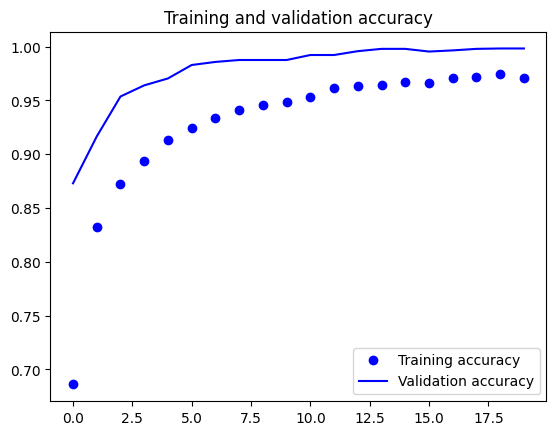

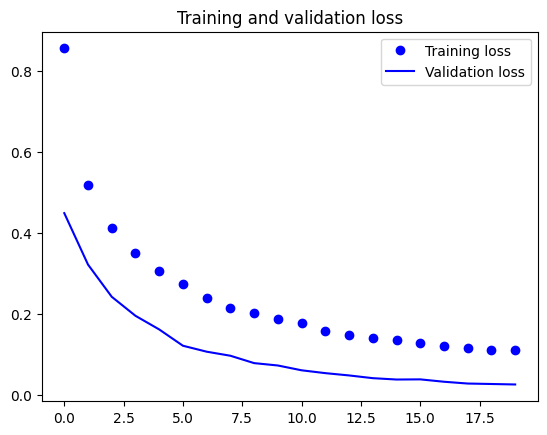

In [114]:
accuracy = flowersTrain.history['accuracy']
val_accuracy = flowersTrain.history['val_accuracy']
loss = flowersTrain.history['loss']
val_loss = flowersTrain.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [115]:
predicted_classes2 = flowersModel.predict(test_X)

110/110 [==============================] - 9s 80ms/step


In [116]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [117]:
predicted_classes.shape, test_Y.shape

((3501,), (3501,))

# Aprendamos de los errores: Qué mejorar

Found 3496 correct labels


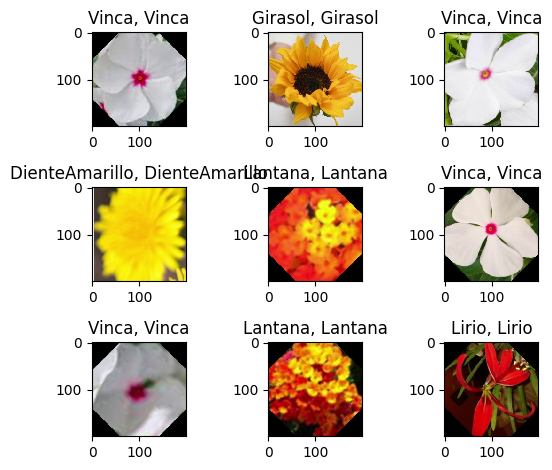

In [118]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 5 incorrect labels


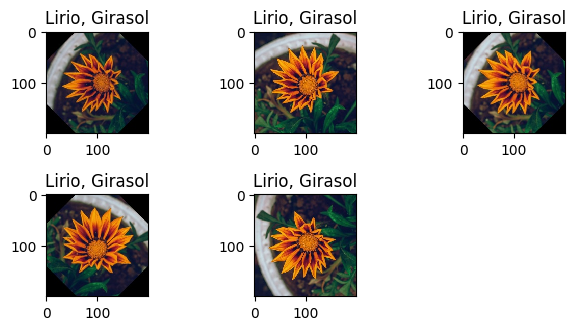

In [119]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(200,200,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [120]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       728
     Class 1       1.00      0.99      0.99       489
     Class 2       1.00      1.00      1.00       836
     Class 3       0.99      1.00      1.00       689
     Class 4       1.00      1.00      1.00       759

    accuracy                           1.00      3501
   macro avg       1.00      1.00      1.00      3501
weighted avg       1.00      1.00      1.00      3501

